In [2]:
import pandas as pd
import os, pathlib, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from import_clean import *
from calculate import *
from itertools import combinations
from tqdm.notebook import tqdm

In [3]:
all_data = cleanup_all(import_all_data("utla"), remove_geography_code=False)

c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts009-utla.csv not found in data/census2021-ts009
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts012-utla.csv not found in data/census2021-ts012
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts013-utla.csv not found in data/census2021-ts013
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021-ts022-utla.csv not found in data/census2021-ts022
  warnings.warn(f"File {folder}-{region}.csv not found in data/{folder}")
c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:107: UserWarning: File census2021

In [32]:

keys = list(all_data.keys())
keys.remove("TS006")
keys.remove("TS008")
keys.remove("TS020")
keys.remove("TS041")
keys.remove("TS007A")

In [4]:
nonstandard = pd.DataFrame(columns=['Code', 'Count'])
for dfCode in list(all_data.keys()):
    if len([column for column in list(all_data[dfCode].columns) if "Total" in column]) != 1:
        nonstandard = pd.concat([nonstandard, pd.DataFrame({'Code': dfCode, 'Count': len([column for column in list(all_data[dfCode].columns) if "Total" in column])}, index=[0])])
nonstandard

,Code,Count
0,TS006,0
0,TS008,0
0,TS020,0
0,TS041,0


In [33]:
length = math.factorial(len(keys)) / (math.factorial(2) * math.factorial(len(keys) - 2))
uid = 0
tempList = []
for k1, k2 in tqdm(combinations(keys, 2), total=length):
    dataframes = [all_data[k1], all_data[k2]]
    columns = [[column for column in df.columns if column != "geography code" and "Total" not in column] for df in dataframes] 
    df_merged = dataframes[0].merge(dataframes[1], on="geography code")
    for column_set, total in zip(columns, [[column for column in df.columns if "Total" in column][0] for df in dataframes]):
        df_merged[column_set] = df_merged[column_set].divide(df_merged[total], axis=0)
    data = [[(np.corrcoef(np.array(df_merged[column1]), np.array(df_merged[column2]))[0][1], column1, column2) for column2 in columns[1]] for column1 in columns[0]]
    if len(columns[0]) > 1:
        data_new = data[0]
        for i in range(1, len(columns[0])):
            data_new.extend(data[i])
    else:
        data_new = data[0]
    for p, c1, c2, in data_new:
        tempList.append([uid, c1, c2, p, k1, k2])
        uid += 1
coefficients = pd.DataFrame(tempList, columns=['uid', 'variable1', 'variable2', 'coefficient', "k1", "k2"])
        #coefficients = pd.concat([coefficients, pd.DataFrame({"variable1": c1, "variable2": c2, "coefficient": p, "uid":uid}, index=[uid])])
        #uid += 1
    #for column1 in columns[0]:
    #    for column2 in columns[1]:
    #        x, y = df_merged[column1], df_merged[column2]
    #        pearsons = np.corrcoef(np.array(x), np.array(y))[0][1]
    #        coefficients = pd.concat([coefficients, pd.DataFrame({"variable1": column1, "variable2": column2, "coefficient": pearsons}, index=[0])])

  0%|          | 0/1275.0 [00:00<?, ?it/s]

c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\t

In [34]:
root = pathlib.Path("data")
coefficients.to_csv(root/"coefficients.csv")

In [31]:
coefficients["uid"] = range(len(coefficients.index))
coefficients.set_index("uid")

,variable1,variable2,coefficient
uid,,,
0,Residence type: Lives in a household; measures...,Marital and civil partnership status: Never ma...,-0.262839
1,Residence type: Lives in a household; measures...,Marital and civil partnership status: Married ...,0.253423
2,Residence type: Lives in a household; measures...,Marital and civil partnership status: Married ...,0.253506
3,Residence type: Lives in a household; measures...,Marital and civil partnership status: Married ...,0.252847
4,Residence type: Lives in a household; measures...,Marital and civil partnership status: Married ...,-0.136752
...,...,...,...
225980,Provision of unpaid care: Provides 35 to 49 ho...,Number of disabled people in household: 1 pers...,0.805190
225981,Provision of unpaid care: Provides 35 to 49 ho...,Number of disabled people in household: 2 or m...,0.851402
225982,Provision of unpaid care: Provides 50 or more ...,Number of disabled people in household: No peo...,-0.944323


In [4]:
coefficients = pd.read_csv(root/"coefficients.csv")

In [35]:
coefficients_copy = coefficients.copy()

In [36]:
mean = coefficients_copy["coefficient"].mean()
std = coefficients_copy["coefficient"].std()
print(mean, std)

0.010348434314387263 0.43227421227499435


<Axes: xlabel='coefficient', ylabel='Frequency'>

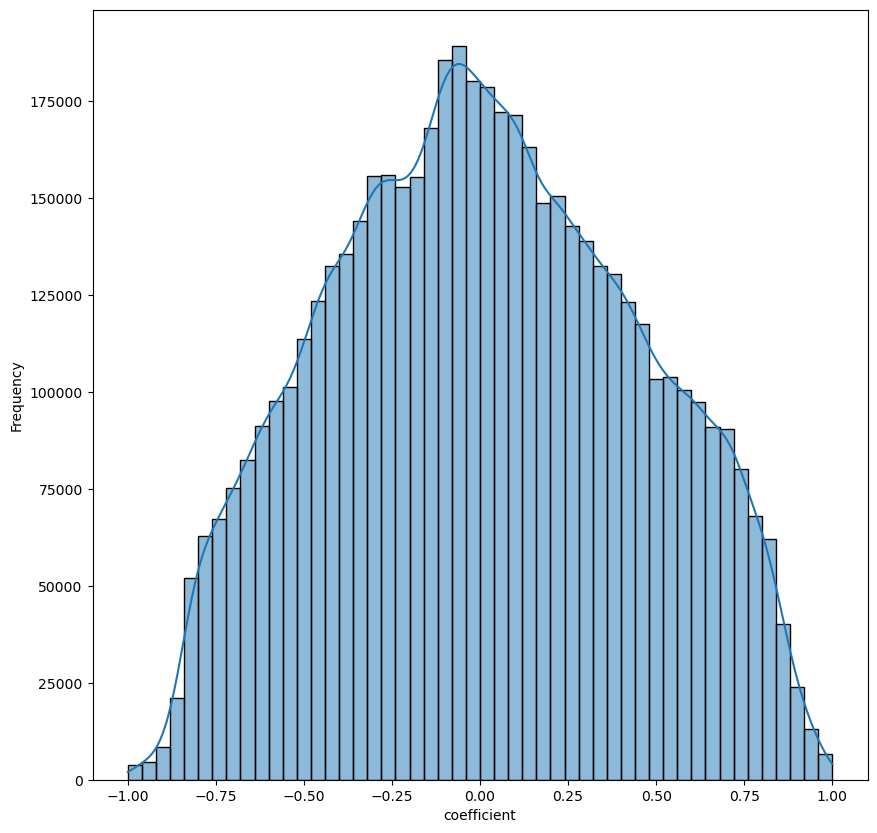

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=coefficients_copy, x='coefficient', ax=ax, bins=50, stat='frequency', kde=True)


In [40]:
number_of_sd = 2
upper_threshold = mean + number_of_sd*std
lower_threshold = mean - number_of_sd*std
print(upper_threshold, lower_threshold)

0.874896858864376 -0.8541999902356014


In [43]:
above = coefficients_copy[coefficients_copy["coefficient"] > upper_threshold]
below = coefficients_copy[coefficients_copy["coefficient"] < lower_threshold]
above = above.sort_values("coefficient", ascending=False)
below = below.sort_values("coefficient", ascending=True)
print(len(above)+len(below))
above = above.head(100)
below = below.head(100)
all = pd.concat([above, below])
all.to_csv(root/"most_correlated.csv")

3037
